importing part 

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os






1:here img is PIL.JpegImagePlugin.JpegImageFile
2:we load pic using image(tensorflow.keras.preprocessing.image) with the help  of load_img method
3: here plt(matplotlib.pyplot) shows image on screen using method named imshow and img(our variable of pic) is passed in imshow

PIL.JpegImagePlugin.JpegImageFile

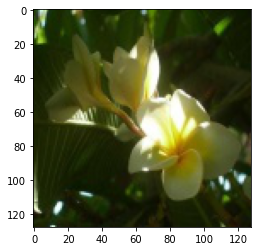

In [3]:
img=image.load_img("data/train/flower frangipani/frangipani (1).jpg")
plt.imshow(img)
type(img)

using cv2 we read pic and see its size i.e. height and width using .shop

In [4]:
cv2.imread("data/train/flower frangipani/frangipani (1).jpg").shape


(128, 128, 3)

In [5]:
train=ImageDataGenerator(rescale=1/127)
validation=ImageDataGenerator(rescale=1/127)

train_dataset=train.flow_from_directory("data/train/",target_size=(128,128),batch_size=5,class_mode='categorical')
val_dataset=train.flow_from_directory("data/val/",target_size=(128,128),batch_size=5,class_mode='categorical')

Found 1357 images belonging to 7 classes.
Found 99 images belonging to 7 classes.


In [6]:
train_dataset.class_indices
val_dataset.class_indices

{'flower bougainvillea': 0,
 'flower frangipani': 1,
 'flower hibiscus': 2,
 'flower lotus': 3,
 'flower rose': 4,
 'flower sunflower': 5,
 'flower thorn_apple': 6}

In [7]:
train_dataset.classes
val_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6])

In [8]:
model= keras.models.Sequential()

model.add(keras.layers.Conv2D(filters=250,kernel_size=3,padding='valid',activation='softmax'))
model.add(keras.layers.MaxPool2D(pool_size=(2, 2), strides=1, padding='valid'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units= 2,activation='softmax'))
model.add(keras.layers.Dense(units= 2,activation='softmax'))
model.add(keras.layers.Dense(units= 7,activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [9]:
model.fit(x=train_dataset,batch_size=5,epochs=9,validation_data=val_dataset)

Epoch 1/9
272/272 [==============================] - ETA: 0s - loss: 1.9533 - accuracy: 0.1326

UnknownError: Graph execution error:

UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x00000215000F84F0>
Traceback (most recent call last):

  File "c:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\script_ops.py", line 270, in __call__
    ret = func(*args)

  File "c:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\autograph\impl\api.py", line 642, in wrapper
    return func(*args, **kwargs)

  File "c:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py", line 1030, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))

  File "c:\ProgramData\Anaconda3\lib\site-packages\keras\engine\data_adapter.py", line 831, in wrapped_generator
    for data in generator_fn():

  File "c:\ProgramData\Anaconda3\lib\site-packages\keras\engine\data_adapter.py", line 957, in generator_fn
    yield x[i]

  File "c:\ProgramData\Anaconda3\lib\site-packages\keras\preprocessing\image.py", line 110, in __getitem__
    return self._get_batches_of_transformed_samples(index_array)

  File "c:\ProgramData\Anaconda3\lib\site-packages\keras\preprocessing\image.py", line 337, in _get_batches_of_transformed_samples
    img = image_utils.load_img(

  File "c:\ProgramData\Anaconda3\lib\site-packages\keras\utils\image_utils.py", line 394, in load_img
    img = pil_image.open(io.BytesIO(f.read()))

  File "c:\ProgramData\Anaconda3\lib\site-packages\PIL\Image.py", line 3030, in open
    raise UnidentifiedImageError(

PIL.UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x00000215000F84F0>


	 [[{{node PyFunc}}]]
	 [[IteratorGetNext]] [Op:__inference_test_function_2166]

In [ ]:
model.save('myFirstModel')

INFO:tensorflow:Assets written to: myFirstModel\assets


INFO:tensorflow:Assets written to: myFirstModel\assets


In [3]:
saved_model=keras.models.load_model('myFirstModel')

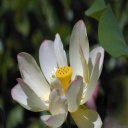

In [23]:
test_image = image.load_img('data/val/flower lotus/lotus (11).jpg', target_size = (128, 128))
test_image

In [24]:
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result = saved_model.predict(test_image)
new_prediction = np.argmax(result,axis=1)
if(new_prediction[0] ==0):
    print('bougainvillea')
if(new_prediction[0] ==1):
    print('frangipani')
if(new_prediction[0] ==2):
    print('hibiscus')

1/1 [==============================] - 0s 68ms/step
frangipani
